## TABLE OF CONTENT:
### 1. INTRODUCTION
### 2. NAIVE-BAYES THEOREM
### 3. SENTIMENTAL ANALYSIS
### 4. CASE STUDY: SENTIMENTAL ANALYSIS FOR MOVIE REVIEW USING NAVIE-BAYES CLASSIFIER
### 5. CONCLUSION

## 1. Introduction
Bayes Theorem is named for English mathematician Thomas Bayes, who worked extensively in decision theory, the field of mathematics that involves probabilities.

Bayes Theorem is also used widely in machine learning, where it is a simple, effective way to predict classes with precision and accuracy. The Bayesian method of calculating conditional probabilities is used in machine learning applications that involve classification tasks.

A simplified version of the Bayes Theorem, known as the Naive Bayes Classification, is used to reduce computation time and costs. In this article, we take you through these concepts and discuss the applications of the Bayes Theorem in machine learning. 

## 2. Naive Bayes Theorem

### 2.1 Bayes Theorem Theory

**Bayes Formula:**  
![Bayes Formula](https://miro.medium.com/max/804/1*6dmvRYysiU5PwWIcHRdKVw.png)

#### Explanation of Terms:

- **P(C | x):** The probability of event **C** happening given that event **x** has occurred.
- **P(x | C):** The probability of event **x** happening given that event **C** has occurred.
- **P(C):** The probability of event **C** happening (prior probability).
- **P(x):** The probability of event **x** happening (evidence).

Bayes Theorem provides a way to calculate **conditional probability**. It serves as the foundation for the **Naive Bayes classifier**.


### 2.2. How to Apply Bayes Theorem in Machine Learning

The **Naive Bayes Classifier**, a simplified version of Bayes Theorem, is a popular classification algorithm known for its **accuracy** and **speed** in classifying data into various categories. Let’s explore how it works as a classification tool.

#### Applying Naive Bayes Classifie

- **Example Setup:**  
  Consider a vector `X` consisting of `n` attributes:  
  $$ X = \{x_1, x_2, x_3, \dots, x_n\} $$  
  Assume there are `m` classes:  
  $$ \{C_1, C_2, \dots, C_m\} $$  
  The classifier's task is to predict which class `X` belongs to. The class with the highest posterior probability will be selected. Mathematically, the classifier will predict class $C_i$ if and only if:  
  $$ P(C_i | X) > P(C_j | X) \quad \text{for all} \ j \neq i $$

  Using **Bayes Theorem**, we can express the probability as:  
  $$ P(C_i | X) = \frac{P(X | C_i) \cdot P(C)}{P(X)} $$

- **Explanation of Terms:**
  - $P(X)$: A constant independent of the classes, so it remains unchanged regardless of the class.
  - To maximize $P(C_i | X)$, we can focus on maximizing $P(X | C_i) \cdot P(C_i)$, since $P(X)$ is the sameor all classes.

- **Equal Probability Assumption:**  
  If we assume each class is equally likely, then:  
  $$ P(C_1) = P(C_2= \dots = P(C_m) $$

- **Handling Attributes:**
  - For each attribute $x_k$, it's important to determine whether it's **categorical** or **continuous** because this affects how we coute the probabilities.

- **Computing the Likelihood:**  
  For continuous attributes, we assume a distribution, such as Gaussian, and compute the likelihood as:  
  $$ P(x_k | C_i) = F(x_k, \mu_k, \sigma_k) $$  
  where $\mu_k$ and $\sigma_k$ are the mean and standard deviation for att

**Final Prediction:**
  After calculating the probabilities for each class $C_i$, the predicted class will be the one that maximizes:
$$P(X \mid C_i)\cdot P(C_i)$$

### 2.3. Advantage, DisAdvantage of Navie- Bayes Classifier:

### Advantage: 

- It is easy and fast to predict the class of the test data set. It also performs well in multi-class prediction.

- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.

- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

### Disadvantage: 

- Naive Bayes is also known as a bad estimator, so the probability outputs are not to be taken too seriously.

- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

# 3. Sentimental analysis: 
 Sentiment analysis is basically concerned with analysis of emotions and opinions from text.

 A sentiment evaluation system for text analysis combines natural language processing (NLP) and laptop mastering methods to assign weighted sentiment scores to the entities, topics, issues and categories inside a sentence or phrase.It tries to find and justify sentiment of the person with respect to a given source of content.

I am proposing a highly accurate model of sentiment analysis from a datasets containing movie review score with the help of classifiers such as Naïve Bayes, the application can correctly classify the reviews of the given datasets as positive and negative to give sentiment of each movie.

# 4. Case Study: Sentimental Analysis for Movie Review using Naive-Bayes Classifier
#### In this kernel, we have to predict the number of positive and negative reviews based on sentiments by using Navie-Bayes classification models. We will go through these steps:

## 4.1 Step 1: Importing Libraries

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For EDA
from wordcloud import WordCloud
from collections import Counter

# For text pre-processing
import re, string # Import re and string for regular expressions and string operations
import contractions # Import contractions for expanding contractions
from unidecode import unidecode  # Import unidecode for Unicode normalization

import nltk # Import natural Language Toolkit lib
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt') # For tokenization
nltk.download('wordnet') # For Lemmatization
nltk.download('stopwords') # For stopwords
stop_words = stopwords.words() # Get the stopwords


#for model-building and evaluating
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package punkt to
[nltk_data]     /home/martinvalentine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/martinvalentine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/martinvalentine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4.2 Loading the data set & Exploratory Data Analysis
In this step, we will load the dataset and perform some exploratory data analysis to understand the data better.

In [351]:
# Load the dataset
df=pd.read_csv('Resources/Dataset/IMDB_Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


As we can see, the dataset have two columns: review and sentiment. The review column contains the text of the review, and the sentiment column contains the sentiment of the review (positive or negative).

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [353]:
df.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


There are 50,000 reviews in the dataset, with an equal number of positive and negative reviews. The dataset does not contain any missing values. The unique values in the sentiment column are 'positive' and 'negative'.

In [354]:
# View the distribution of sentiment
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

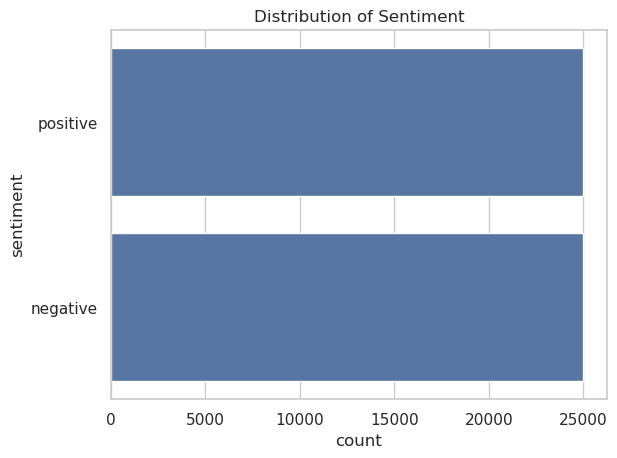

In [355]:
# Visualize the distribution of sentiment in vertical bar chart
sns.countplot(df['sentiment'])
plt.title('Distribution of Sentiment')
plt.show()


The dataset for sentiment analysis is balanced, with an equal number of positive and negative reviews. The dataset contains 25,000 positive reviews and 25,000 negative reviews.

When we are working with text data, it is essential to understand the characteristics of the text data. There are some elements that affect the sentiment of the text, such as the length of the text, the presence of special characters, and the use of punctuation. In this section, we will analyze the text data to gain insights into the reviews.

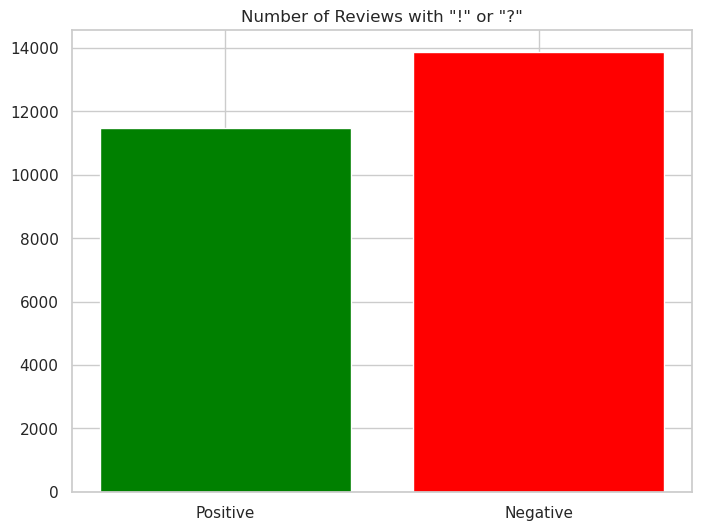

In [356]:
# Filter reviews with "!" or "?" and count positive and negative reviews
positive_count = df[(df['review'].str.contains(r'[!?]', regex=True)) & (df['sentiment'] == "positive")].shape[0]
negative_count = df[(df['review'].str.contains(r'[!?]', regex=True)) & (df['sentiment'] == "negative")].shape[0]

# Display the counts in plot
plt.figure(figsize=(8,6))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['green', 'red'])
plt.title('Number of Reviews with "!" or "?"')
plt.show()


We can see that the number of positive reviews with "!" or "?" is higher than the number of negative reviews with "!" or "?". This indicates that people tend to use exclamation and question marks more frequently in positive reviews than in negative reviews.

### Average length of reviews

Text(0.5, 1.0, 'Negative Reviews')

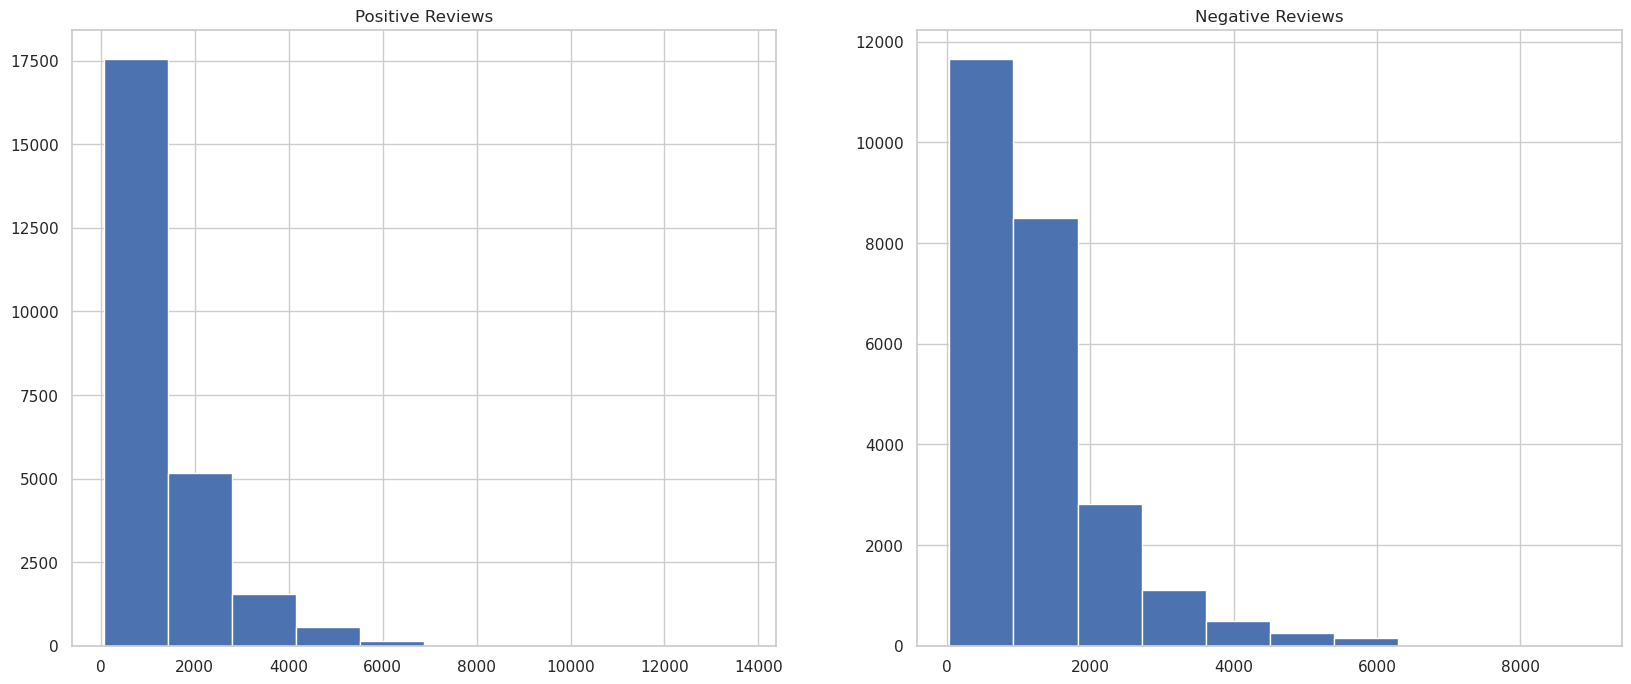

In [357]:
# Calculate the length of reviews
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8)) # Create a figure and a set of subplots with 1 row and 2 columns and set the figure size to 12x8
ax1.hist(df[df['sentiment'] == 'positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment'] == 'negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

From the histogram, we can observe some insights:
- The length of reviews for both positive and negative reviews is mostly between 0 and 5000. In general, people comment less word in the positive review than negative reviews.
- However, the length of negative reviews is more varied than positive reviews. It means in some case, people tend to write more words for excellent movies and could less criticise for bad movies.

Next, we're going to do some data preprocessing to clean the text data. We'll make a words cloud to see the most frequent words in large font and least used words in small font  in the positive and negative reviews.

**Note**: 
- Word clouds are a popular way to visualize text data. The size of each word indicates its frequency or importance.
- We need to import the library `WordCloud` to create a word cloud. (as we did in the import library section)


### Distribution of word count in reviews

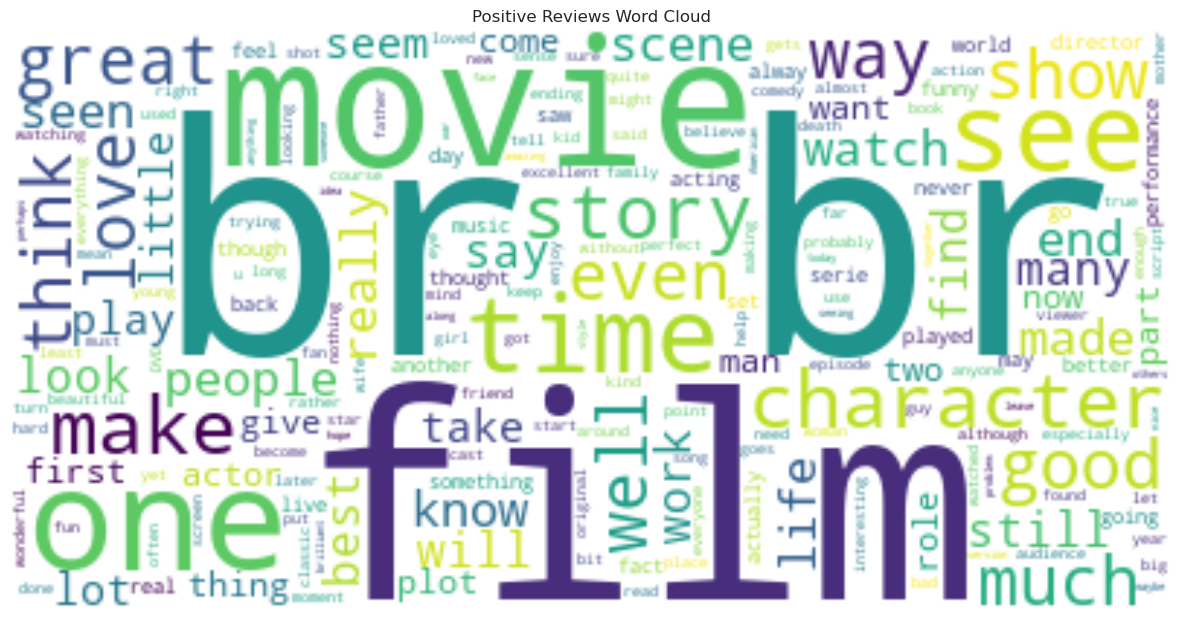

In [358]:
# Word Cloud for positive reviews:
text = " ".join(i for i in df[df['sentiment'] == 'positive']['review'])
wordcloud = WordCloud(background_color='white').generate(text) # Create a word cloud image background color white

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

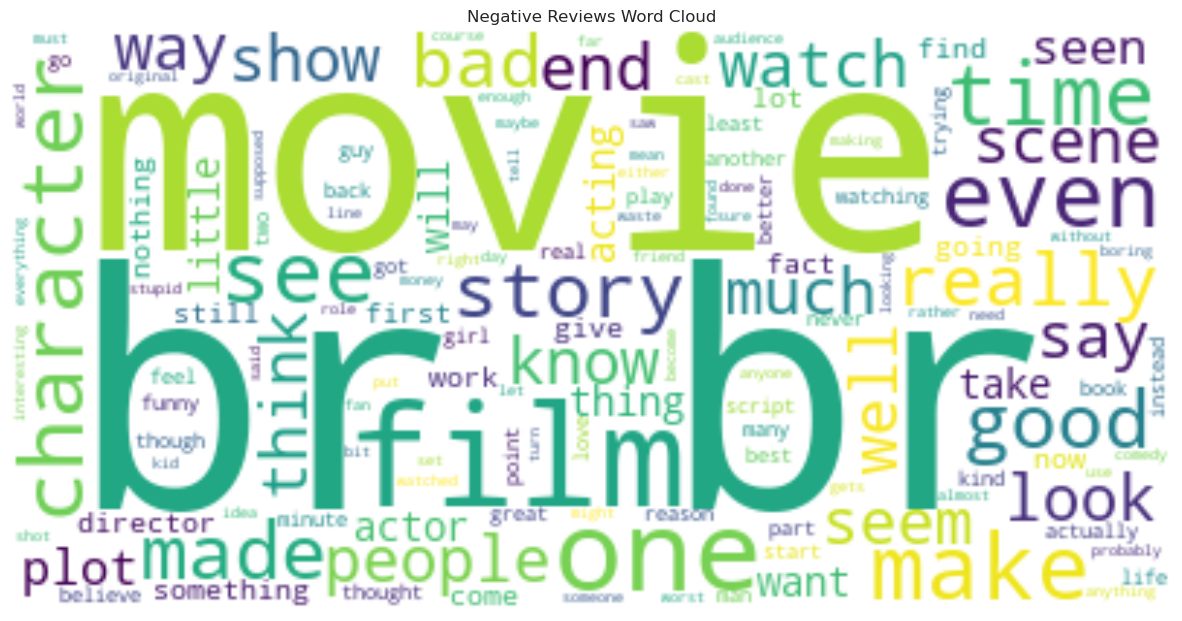

In [359]:
# Word Cloud for negative reviews:
text = " ".join(i for i in df[df['sentiment'] == 'negative']['review'])
wordcloud = WordCloud(background_color='white').generate(text) # Create a word cloud image background color white

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

As we can see from the word cloud, both of them don't show any significant difference in the most frequent words. So we can't get much information from this word cloud. We will try to clean the text data and see if we can get more insights from the word cloud. 

## 4.3 Text pre-processing
Data preprocessing is a crucial step in any machine learning project. It involves cleaning and transforming the data to make it suitable for building and training machine learning models.

In this section, we will perform the following data preprocessing steps:
- Remove special characters, numbers, and punctuation
- Convert text to lowercase
- Remove URLs, emojis, and emoticons
- Remove stopwords
- Tokenization

In [360]:
# Rename the column review to text:
df.rename(columns={'review':'text'}, inplace = True)
df

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [361]:
from unidecode import unidecode
# Remove special characters, numbers, and punctuation
def clean_noise_data(text, keepPunctuationMark=False):
    # Use unidecode to normalize special characters to ASCII equivalents such as é -> e, ñ -> n, etc.
    text = unidecode(text)  
    
    # Handle word after use unicode to ASCII, like it s -> it's for expanding contractions
    # Todo: Add more contractions
    
    # Convert text to lowercase for uniformity
    text = text.lower()
    
    # Replace special characters (e.g., "!|s" with "'s")
    text = text.replace("!|s", "'s").replace("!ss", "'")


    # Remove URLs and HTML tags to clean the text
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    
    # Remove numbers to focus on textual data
    text = re.sub(r"\b\d+\b", "", text)

    # Expand contractions for consistent spacing
    expanded_words = [contractions.fix(word) for word in text.split()]
    text = ' '.join(expanded_words)
    
    # Handle punctuation based on keepPunctuationMark setting
    if not keepPunctuationMark:
        # Replace all punctuation with spaces
        text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    else:
        # Remove all punctuation except ? and !, replacing other punctuation with spaces
        punctuation_except_marks = string.punctuation.replace('?', '').replace('!', '')
        text = re.sub(r'[%s]' % re.escape(punctuation_except_marks), ' ', text)
        
        # Add a space before ? and ! if they're attached to a word
        text = re.sub(r'(?<!\s)([?!])', r' \1', text)

    # Remove newline characters for cleaner text
    text = re.sub(r'\n', ' ', text)
    
    # Remove specific special characters that are not needed (such as curly quotes)
    text = re.sub(r'[’“”…]', '', text)
    
    # Define a pattern to remove emojis from the text
    emoji_pattern = re.compile(r"["  
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    # Remove emojis from the text
    text = emoji_pattern.sub(r'', text)  

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()  # Also trim leading and trailing spaces

    return text

# Test the function with an example text
example_text = df['text'][48302]
cleaned_text = clean_noise_data(example_text)

print('Original Text:\n', example_text)
print('\n After Cleaning:\n', cleaned_text)


Original Text:
 October Sky is a highly lauded movie, and it¡¦s easy to see why. The story is easy to comprehend and many turning points are gripping, the actors and actresses do fairly good jobs, especially Jake Gyllenhaal and Chris Cooper, the hero finally gets what he wants, and it¡¦s a true story. Frankly I think the director¡¦s achievement is not comparable to the sparks and heat the original story generates. We don¡¦t see any special narrative or cinematography; the power of the movie relies much on the riveting plot and tough situation the young hero is trapped in that most audience will find themselves identify with the characters. We feel Homer¡¦s desire to earn his father¡¦s recognition and create his own future, and his resilience wins our respect. ¡§October Sky¡¨ reminds me of a later 2001 Japanese production of mini series ¡§Rocket Boy,¡¨ which might owe some of the inspiration from this movie. Actually these two works shot from two different cultures provide interesting c

In [362]:
# Apply the function to clean the review column without keeping punctuation marks:
data_cleaned = df['text'].apply(lambda x: clean_noise_data(x, keepPunctuationMark=False))

# Apply the function to clean the review column and keep exclamation and question marks:
data_cleaned_punctuation = df['text'].apply(lambda x: clean_noise_data(x, keepPunctuationMark=True))

In [363]:
data_cleaned

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: text, Length: 50000, dtype: object

In [364]:
# Print an example data after cleaning
data_cleaned[9]

'if you like original gut wrenching laughter you will like this movie if you are young or old then you will love this movie hell even my mom liked it great camp'

In [365]:
data_cleaned_punctuation

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: text, Length: 50000, dtype: object

In [366]:
# Print an example data after cleaning
data_cleaned_punctuation[9]

'if you like original gut wrenching laughter you will like this movie if you are young or old then you will love this movie hell even my mom liked it great camp ! ! !'

We have cleaned the text data by removing special characters, numbers, punctuation, URLs, emojis, and emoticons to ensure consistency and readability. Additionally, we standardized the text by replacing short forms with their full versions to improve comprehension. In a separate cleaning process, we retained exclamation and question marks for clarity and emphasis, which helps in accurately capturing the sentiment and tone of the original text.

Because the data after removed is pandas Series objects, we need to convert it to a data frame before we start removing stopwords.

In [367]:
# Convert to data frame before start removing stopwords and add sentiment column to the data frame
cleaned_df = data_cleaned.to_frame(name='text')
cleaned_df['sentiment'] = df['sentiment']

cleaned_df_punctuation = data_cleaned_punctuation.to_frame(name='text')
cleaned_df_punctuation['sentiment'] = df['sentiment']

In [368]:
print(type(cleaned_df))
print(type(cleaned_df_punctuation))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [369]:
cleaned_df.head()

,text,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter mattei s love in the time of money is a...,positive


In [370]:
cleaned_df_punctuation.head()

,text,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter mattei s love in the time of money is a...,positive


### Remove Stopwords
**Why we need to remove stoptwords?**
- **Focus on meaningful content**: Stop words (e.g., "and," "the," "is") do not carry significant meaning for the sentiment of a text. They are common words that don't add to the positive or negative tone of a sentence. By removing them, you focus on the more relevant words that actually contribute to the sentiment
- **Reduce noise**: Including stop words can introduce noise in your data, making the model less efficient. By removing them, you clean the data, reducing irrelevant information.
- **Improved performance**: With fewer words in the dataset, computations become faster and more efficient, leading to better model performance and reduced memory usage.
- **Enhanced accuracy**: Stop words can dilute the signal in sentiment analysis. Removing them allows the model to focus on more influential words, improving the accuracy of your sentiment predictions.

**How to remove stopwords?**
- We can use the `nltk` library to remove stopwords from the text data. The `nltk` library provides a list of stopwords in different languages, which we can use to filter out these words from the text data.

### Solution for Reducing Processing Time (Using GPU Acceleration)

If you have an integrated GPU on your laptop or PC, consider using the following libraries to speed up processing. These libraries enable GPU acceleration for common libraries like **pandas**, **numpy**, and others, which can significantly reduce processing time:

1. **CuPy**: A library similar to NumPy that allows GPU-accelerated computations.
2. **RAPIDS**: An open-source GPU data science suite with support for libraries like cuDF (for pandas-like DataFrames) and cuML (for machine learning).

By utilizing these libraries, you can leverage your GPU for faster data processing and computations.

#### **Note**: 
Before using these libraries, ensure that you have the necessary drivers and dependencies installed on your system.

#### **Requirements**: 
- **NVIDIA CUDA Toolkit**
- **NVIDIA GPU**
- Compatible **drivers**

### Installation Guide

1. **CuPy Installation**: 
   - You can install CuPy using the following command:
     ```bash
     pip install cupy
     ```
   - However, installing with pip requires you to set up the NVIDIA CUDA Toolkit manually, which can be challenging. Instead, you can install it via **conda-forge**, which handles the setup for you:
     ```bash
     conda install -c conda-forge cupy
     ```

2. **RAPIDS Installation**:
   - First, visit the [RAPIDS official website](https://rapids.ai/start.html) and select the version of RAPIDS you want to install. Follow the installation instructions provided.
   - If you’re using Google Colab, you can install RAPIDS with the following code:
     ```bash
     # Fetch RAPIDS-Colab install files and test your GPU. Run this and the next cell only.
     # Read the output of this cell. If your Colab instance is not RAPIDS compatible, it will provide guidance.
     !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
     !python rapidsai-csp-utils/colab/pip-install.py
     ```
   - This process typically takes around 5-6 minutes on Google Colab.

Once installed, you can use these libraries to accelerate text preprocessing and other data tasks with GPU-optimized functions.


In [371]:
# Code for removing stopwords using GPU acceleration (Rapids)
# Uncomment this code if you have installed RAPIDS on your system and want to use GPU acceleration for faster processing. And remember to comment the next code for removing stopwords.

#TODO: Remove stopwords using GPU acceleration


### Remove Stopwords using CPU acceleration

In [372]:
data_cleaned.head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter mattei s love in the time of money is a...
Name: text, dtype: object

In [373]:
# Comment this code if you want to use GPU acceleration for faster processing
# Remove stopwords using CPU acceleration: (This may take a few minutes to complete - with I5 12400, it takes around 10 minutes for this dataset)

# Remove stopwords with no punctuation marks
cleaned_df['no_sw'] = cleaned_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Remove stopwords with punctuation marks
cleaned_df_punctuation['no_sw'] = cleaned_df_punctuation['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [374]:
cleaned_df

,text,sentiment,no_sw
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode hooked...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...
3,basically there is a family where a little boy...,negative,basically family boy jake thinks zombie closet...
4,petter mattei s love in the time of money is a...,positive,petter mattei love time money visually stunnin...
...,...,...,...
49995,i thought this movie did a down right good job...,positive,movie job creative original expecting lotta fu...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,plot dialogue acting idiotic directing annoyin...
49997,i am a catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,i am going to have to disagree with the previo...,negative,disagree previous comment side maltin rate exc...


In [375]:
# Print original text and cleaned text:
print('Original Text:\n', cleaned_df['text'][9])
print('\n')
print('After remove stopwords:\n', cleaned_df['no_sw'][9])

Original Text:
 if you like original gut wrenching laughter you will like this movie if you are young or old then you will love this movie hell even my mom liked it great camp


After remove stopwords:
 original gut wrenching laughter movie young love movie hell mom great camp


In [376]:
cleaned_df_punctuation

,text,sentiment,no_sw
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode hooked...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...
3,basically there is a family where a little boy...,negative,basically family boy jake thinks zombie closet...
4,petter mattei s love in the time of money is a...,positive,petter mattei love time money visually stunnin...
...,...,...,...
49995,i thought this movie did a down right good job...,positive,movie job creative original expecting lotta fu...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,plot dialogue acting idiotic directing annoyin...
49997,i am a catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,i am going to have to disagree with the previo...,negative,disagree previous comment side maltin rate exc...


In [377]:
# Print original text and cleaned text:
print('Original Text:\n', cleaned_df_punctuation['text'][9])
print('\n')
print('After remove stopwords:\n', cleaned_df_punctuation['no_sw'][9])

Original Text:
 if you like original gut wrenching laughter you will like this movie if you are young or old then you will love this movie hell even my mom liked it great camp ! ! !


After remove stopwords:
 original gut wrenching laughter movie young love movie hell mom great camp ! ! !


After removing the stopwords, the text data is now cleaner and more focused on the meaningful content. The removal of stopwords helps to reduce noise in the data and improve the efficiency of the model by focusing on the most relevant words that contribute to the sentiment of the reviews.

Now we will visualize the most frequent words in the cleaned text data using a word cloud to gain insights into the sentiment of the reviews after preprocessing.

#### Word Cloud for positive reviews and wordcloud for negative reviews **without stopwords and punctuation marks**:

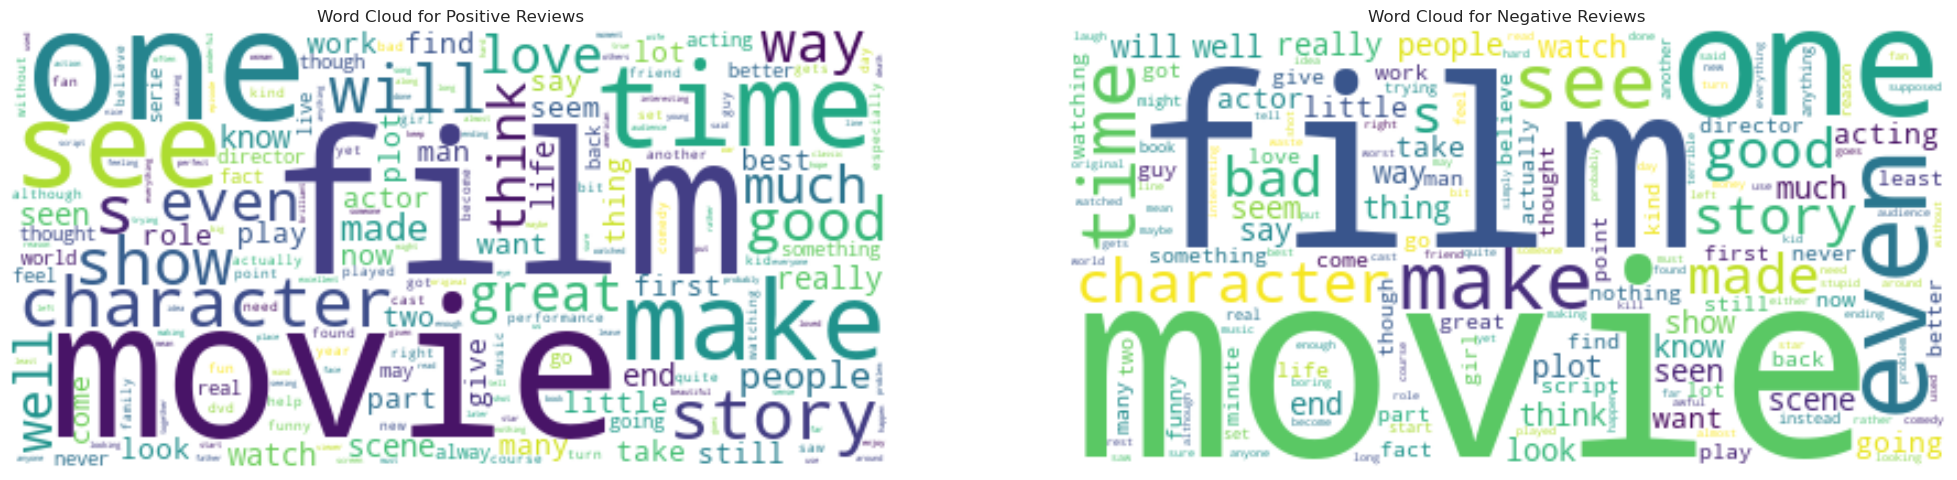

In [378]:
# Word Cloud for positive reviews and wordcloud for negative reviews without stopwords and punctuation marks:

# Generate word cloud for positive reviews
positive_reviews = " ".join(review for review in cleaned_df[cleaned_df['sentiment'] == "positive"]['text'])
positive_wordcloud = WordCloud(background_color='white').generate(positive_reviews)

# Generate word cloud for negative reviews
negative_reviews = " ".join(review for review in cleaned_df[cleaned_df['sentiment'] == "negative"]['text'])
negative_wordcloud = WordCloud(background_color='white').generate(negative_reviews)

# Set up side-by-side plotting
plt.figure(figsize=(25, 15))

# Plot positive reviews word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')

# Plot negative reviews word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

# Show the plots
plt.show()

#### Word Cloud for positive reviews and wordcloud for negative reviews **with punctuation marks and without stopwords**:

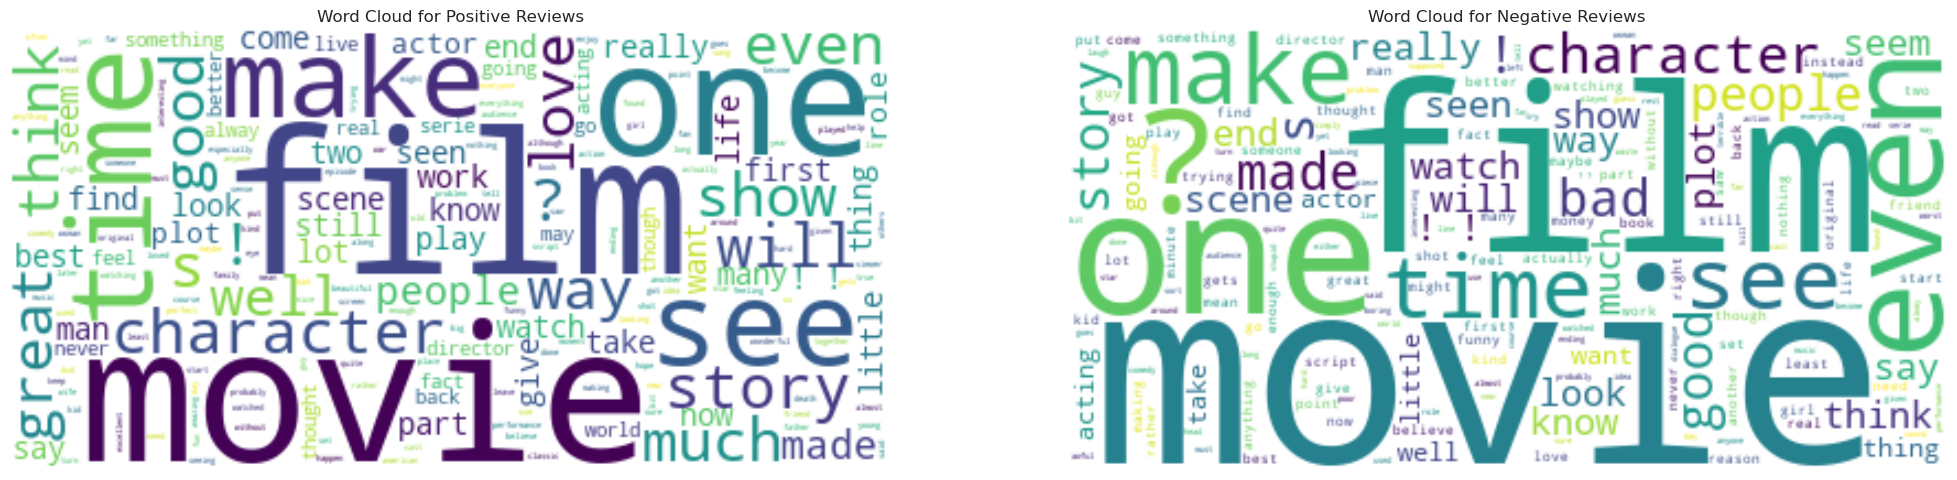

In [379]:
# Word Cloud for positive reviews and wordcloud for negative reviews with punctuation marks and without stopwords and :

# Generate word cloud for positive reviews, including punctuation
positive_reviews = " ".join(review for review in cleaned_df_punctuation[cleaned_df_punctuation['sentiment'] == "positive"]['text'])
positive_wordcloud = WordCloud(background_color='white', regexp=r'\w+|\?|!').generate(positive_reviews)

# Generate word cloud for negative reviews, including punctuation
negative_reviews = " ".join(review for review in cleaned_df_punctuation[cleaned_df_punctuation['sentiment'] == "negative"]['text'])
negative_wordcloud = WordCloud(background_color='white', regexp=r'\w+|\?|!').generate(negative_reviews)

# Set up side-by-side plotting
plt.figure(figsize=(25, 15))

# Plot positive reviews word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')

# Plot negative reviews word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

# Show the plots
plt.show()



In [380]:

import pandas as pd

# Assuming cleaned_df is already loaded
# Find rows in 'review' column containing a standalone 'S'
standalone_s_reviews = cleaned_df[cleaned_df['no_sw'].str.contains(r'\bs\b', regex=True)]

# Display the rows to inspect them
standalone_s_reviews

,text,sentiment,no_sw


In [381]:
cleaned_df_punctuation['text'][48302]

'october sky is a highly lauded movie and it is easy to see why the story is easy to comprehend and many turning points are gripping the actors and actresses do fairly good jobs especially jake gyllenhaal and chris cooper the hero finally gets what he wants and it is a true story frankly i think the director s achievement is not comparable to the sparks and heat the original story generates we don ! t see any special narrative or cinematography the power of the movie relies much on the riveting plot and tough situation the young hero is trapped in that most audience will find themselves identify with the characters we feel homer s desire to earn his father s recognition and create his own future and his resilience wins our respect october sky ! reminds me of a later japanese production of mini series rocket boy ! which might owe some of the inspiration from this movie actually these two works shot from two different cultures provide interesting comparison when october sky unfolds a sto

We can see that the word clouds for positive and negative reviews show the most frequent words in the text data. The size of each word indicates its frequency in the reviews. The word clouds provide insights into the sentiment of the reviews and help identify the most common words used in positive and negative reviews. But we can see that the most frequent words are not very informative.

Next, we need to find most frequent words in the positive and negative reviews. Then we remove they from the text data.

**Why we need to remove the most frequent words?**
- **Removing Noise**: **Frequent words** are often generic and carry little meaningful information about the specific context of the text. For example, words like "the", "is", or "in" are common in many documents but don't help in distinguishing one text from another. These words are known as stopwords, and even after stopword removal, other domain-specific or overly common words may still dominate the dataset.
- *Improving Model Performance*: By removing the most frequent words, you can reduce the noise in the dataset. This allows the model to focus on the more relevant words that contribute to the sentiment, leading to more accurate predictions.
- **Enhancing Topic Discovery**: In tasks like topic modeling or clustering, the most frequent words might overshadow the more meaningful terms. Removing these frequent words allows the algorithm to uncover hidden patterns and topics in the data.
- **Handling Sparsity**: Highly frequent words tend to dominate the feature space, which can cause sparsity issues in some models (especially in count-based models like Bag of Words). Removing them helps in balancing the feature space.

### Draw Cumulative Frequency Plot for 30 Most Frequently Words in Positive Reviews (dataframe **cleaned_df**)


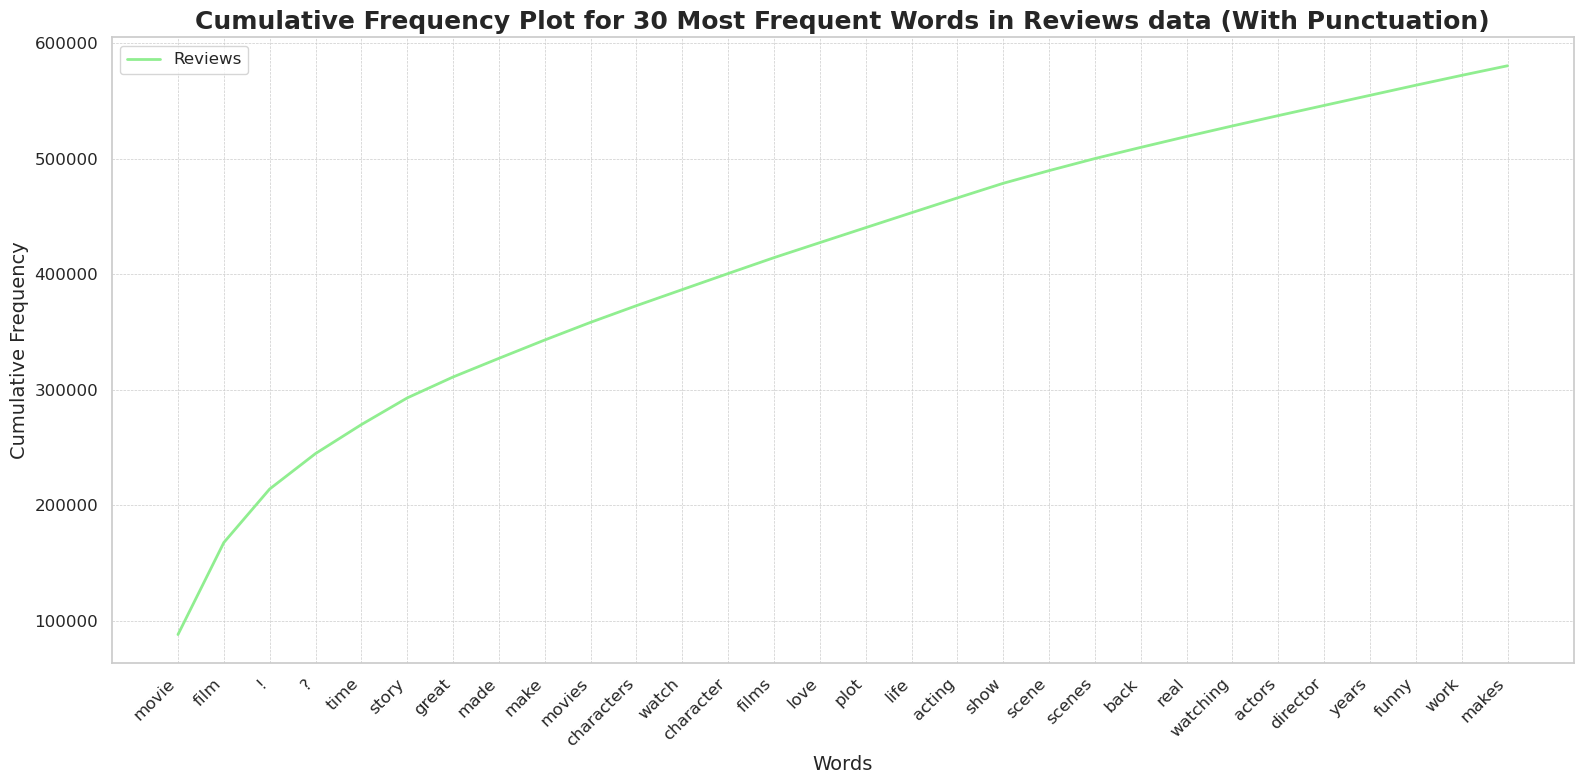

In [416]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Set seaborn style for aesthetics
sns.set(style="whitegrid")

# Extract positive reviews with punctuation retained
reviews = cleaned_df_punctuation['no_sw']

# Tokenize words from positive reviews
review_words = ' '.join(reviews).split()

# Count word frequencies
word_freq = Counter(review_words)

# Get the 30 most common words and their frequencies
most_common_words = word_freq.most_common(30)
words, frequencies = zip(*most_common_words)

# Plot cumulative frequency for the top 30 words
plt.figure(figsize=(16, 8))
plt.title('Cumulative Frequency Plot for 30 Most Frequent Words in Reviews data (With Punctuation)', 
          fontsize=18, weight='bold')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Cumulative Frequency', fontsize=14)
plt.plot(range(1, 31), np.cumsum(frequencies), label='Reviews', color='lightgreen', linewidth=2)

# Customize x-ticks for readability
plt.xticks(ticks=range(1, 31), labels=words, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Add grid for better visualization
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Ensure layout fits within the figure size
plt.tight_layout()

# Display the plot
plt.show()



The cumulative frequency plot highlights the prevalence of certain words like **movie**, **film**, **story**, **time**, and **characters**. While these words contribute heavily to the overall word count, they may add limited value in determining sentiment on their own, as they are common in both positive and negative reviews. However, words like **great** and **love** are clearly sentiment-laden, indicating positive feelings and enthusiasm.

#### Role of Punctuation in Sentiment Analysis

In sentiment analysis, punctuation marks such as **!** and **?** can provide valuable contextual clues:

- **Exclamation marks (!)** often emphasize positive emotions, excitement, or strong endorsement, which can be common in positive reviews.
- **Question marks (?)** may indicate doubt, uncertainty, or dissatisfaction, often found in negative or mixed reviews.

Given these associations, retaining punctuation marks as separate features for models like Naive Bayes and Decision Trees can improve sentiment prediction. For Naive Bayes, which uses token frequency, punctuation marks can help capture the tone of reviews. For Decision Trees, binary or frequency features for punctuation can help the model identify sentiment patterns related to emotional intensity or doubt.

#### Future Enhancement for Sentiment Analysis

- **Remove words with high frequency but low sentiment relevance** (e.g., **film**, **movie**, **time**) to reveal more sentiment-specific words in visualizations like word clouds.
- **Retain punctuation marks (! and ?)** for modeling, as they offer valuable sentiment cues.

This approach aims to strike a balance by filtering out neutral, high-frequency words while preserving words and symbols that better represent the emotional tone of reviews.


### Cumulative Frequency Plot for 30 Most Frequently Words in data without punctuation (dataframe **cleaned_df**)

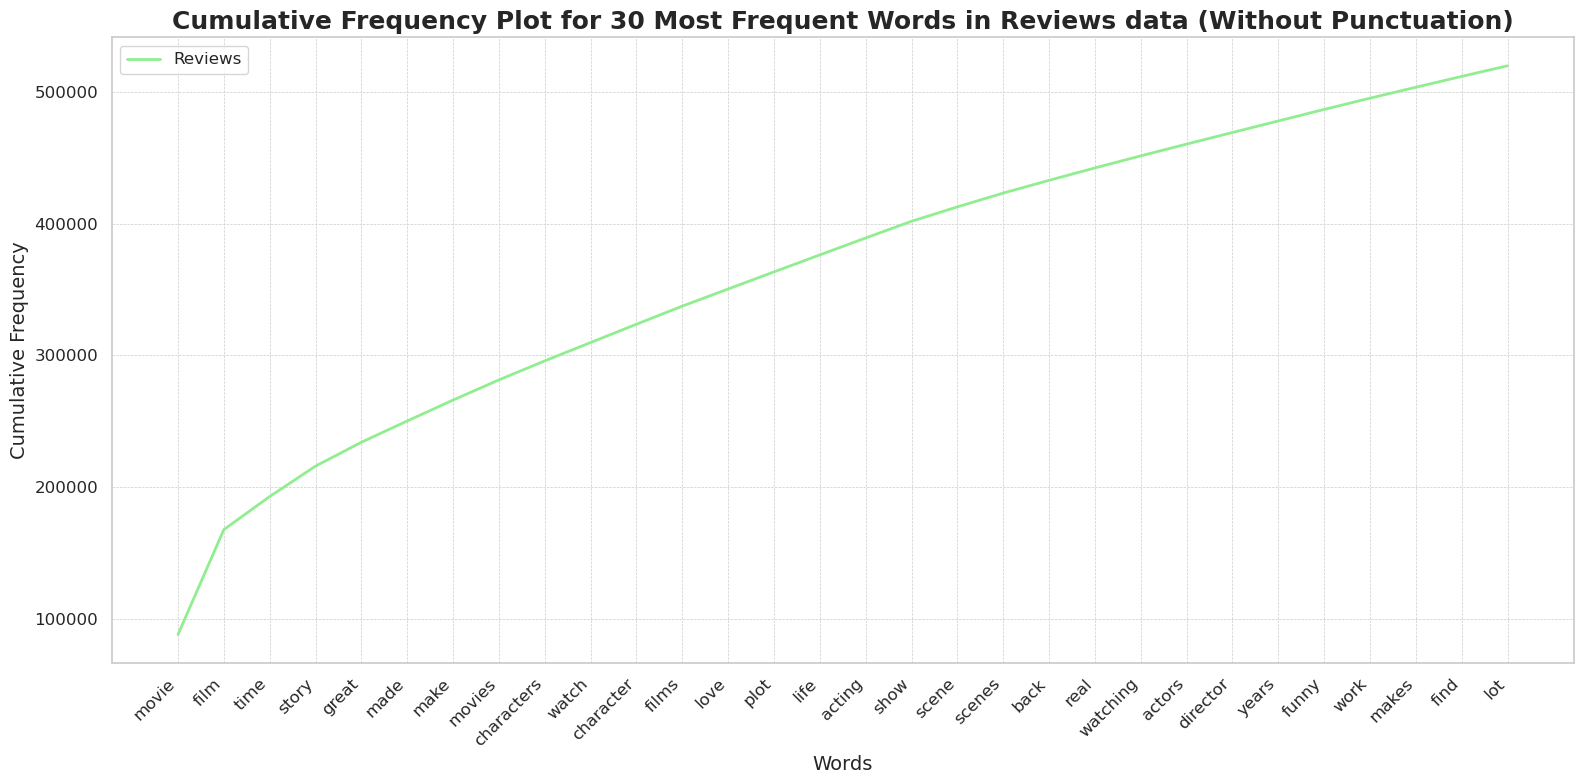

In [418]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Set seaborn style for aesthetics
sns.set(style="whitegrid")

# Extract positive reviews with punctuation retained
reviews = cleaned_df['no_sw']

# Tokenize words from positive reviews
review_words = ' '.join(reviews).split()

# Count word frequencies
word_freq = Counter(review_words)

# Get the 30 most common words and their frequencies
most_common_words = word_freq.most_common(30)
words, frequencies = zip(*most_common_words)

# Plot cumulative frequency for the top 30 words
plt.figure(figsize=(16, 8))
plt.title('Cumulative Frequency Plot for 30 Most Frequent Words in Reviews data (Without Punctuation)', 
          fontsize=18, weight='bold')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Cumulative Frequency', fontsize=14)
plt.plot(range(1, 31), np.cumsum(frequencies), label='Reviews', color='lightgreen', linewidth=2)

# Customize x-ticks for readability
plt.xticks(ticks=range(1, 31), labels=words, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Add grid for better visualization
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Ensure layout fits within the figure size
plt.tight_layout()

# Display the plot
plt.show()




Similar to the above reviews plot, there is a sharp rise at the beginning, indicating that high-frequency words such as **"movie"**, **"film"**, and **"time"** significantly contribute to the overall word count in negative reviews. These words are often mentioned, likely reflecting dissatisfaction with various aspects of the film. Therefore, we will apply the same approach as with the positive reviews plot by removing some less informative words while retaining those that carry meaningful sentiment.



### Remove less informative words in data without punctuation (dataframe **cleaned_df**)

## 4.4 Extracting vectors from text (Vectorization and Lemmatization)

## 4.5 Training the model

## 4.6 Evaluate and Testing the model

## 4.7 Conclusion